Import Libraries

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Read Dataset

In [157]:
df=pd.read_csv('Gender_Classification_Data.csv')
df

,gender,height,weight,age
0,female,166.835558,64.238722,38
1,female,166.321934,67.165489,65
2,male,193.424782,89.342636,67
3,female,167.027904,67.637666,55
4,male,191.822253,93.985117,29
...,...,...,...,...
9995,female,159.231550,64.338891,33
9996,female,166.681690,67.197533,30
9997,female,163.973116,74.565143,65
9998,female,168.363149,72.459247,24


In [158]:
# Checking Null values for Dataset
df.isnull().sum()*100/df.shape[0]

gender    0.0
height    0.0
weight    0.0
age       0.0
dtype: float64

In [159]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  10000 non-null  object 
 1   height  10000 non-null  float64
 2   weight  10000 non-null  float64
 3   age     10000 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 312.6+ KB
None


In [160]:
print(df.describe())

             height        weight           age
count  10000.000000  10000.000000  10000.000000
mean     177.492357     77.532014     43.446300
std       14.119292     11.689473     15.138112
min      144.481109     34.171822     18.000000
25%      164.998420     68.922954     30.000000
50%      176.358023     76.671571     43.000000
75%      190.092636     85.438872     57.000000
max      217.483664    120.290552     69.000000


In [161]:
# Encode gender as numerical values: male=0, female=1
df['gender'] = df['gender'].map({'male': 0, 'female': 1})
df.shape

(10000, 4)

In [162]:
df

,gender,height,weight,age
0,1,166.835558,64.238722,38
1,1,166.321934,67.165489,65
2,0,193.424782,89.342636,67
3,1,167.027904,67.637666,55
4,0,191.822253,93.985117,29
...,...,...,...,...
9995,1,159.231550,64.338891,33
9996,1,166.681690,67.197533,30
9997,1,163.973116,74.565143,65
9998,1,168.363149,72.459247,24


Visualization

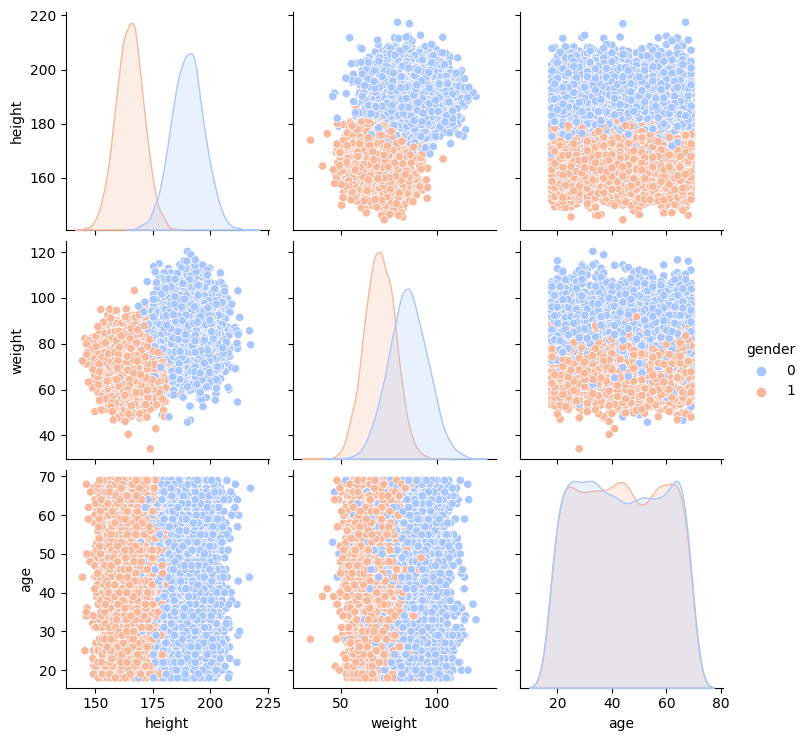

In [163]:
# Visualize features
sns.pairplot(df, hue='gender', palette='coolwarm')
plt.show()

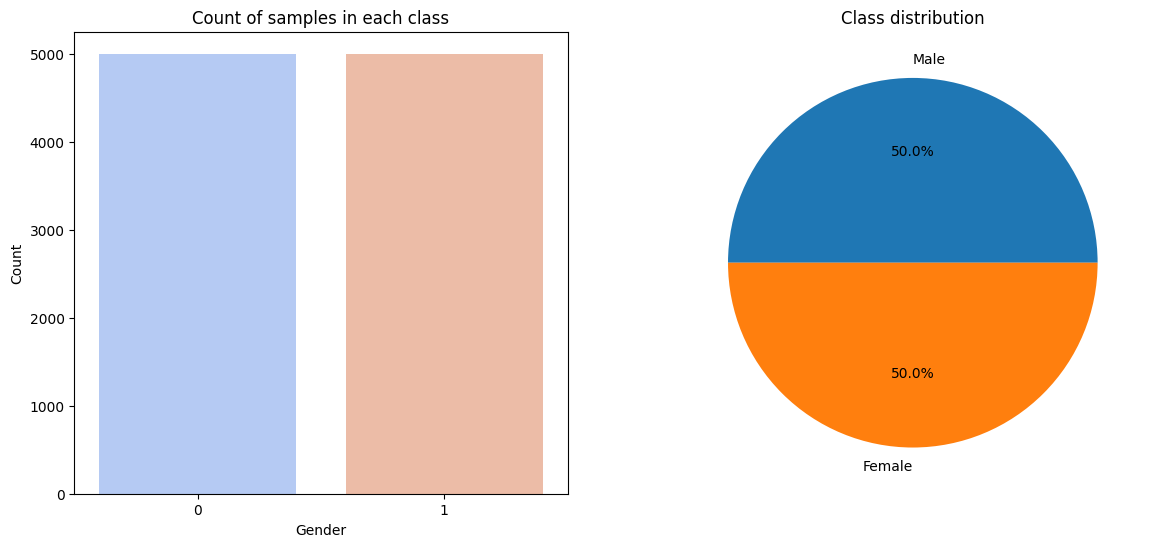

In [164]:
# Count number of samples in each class using bar chart and pie chart
class_counts = df['gender'].value_counts()
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Bar chart
sns.barplot(x=class_counts.index, y=class_counts.values, palette='coolwarm', ax=axs[0])
axs[0].set_title('Count of samples in each class')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count')

# Pie chart
axs[1].pie(class_counts, labels=['Male', 'Female'], colors=['#1f77b4', '#ff7f0e'], autopct='%1.1f%%')
axs[1].set_title('Class distribution')

plt.show()

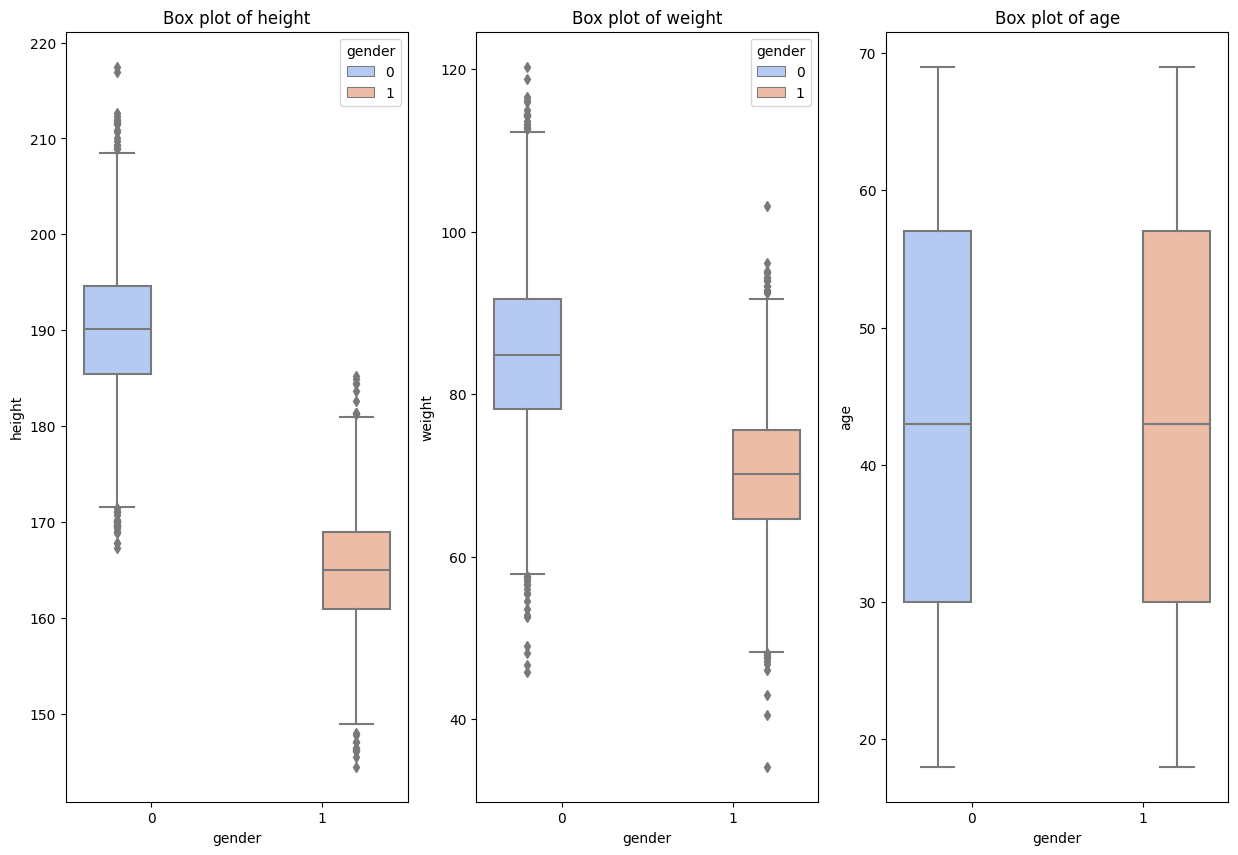

In [165]:
# Box plot for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['height', 'weight', 'age'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='gender', y=feature, data=df, hue='gender', palette='coolwarm')
    plt.title(f'Box plot of {feature}')
plt.legend([],[], frameon=False)
plt.show()

Removing Outliers

In [166]:
#remove outliers from dataset
#Q1 is the 25% and Q3 is 75% of data, Q2 is 50% of data

Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.height >= Q1 - 1.5*IQR) & (df.height <= Q3 + 1.5*IQR)] # drop rows that include outliers 


Q1 = df.weight.quantile(0.25)
Q3 = df.weight.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.weight >= Q1 - 1.5*IQR) & (df.weight <= Q3 + 1.5*IQR)] # drop rows that include outliers

In [167]:
df.shape

(9961, 4)

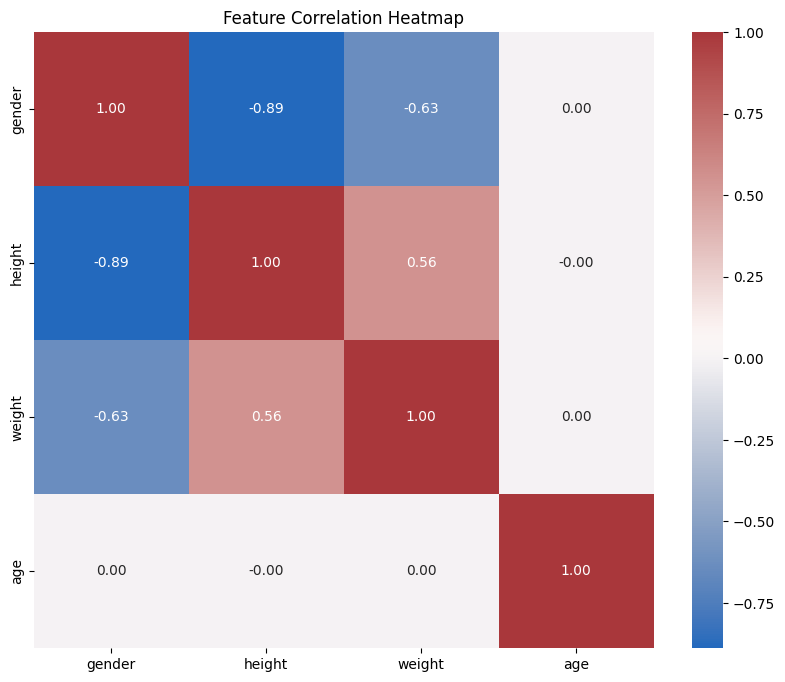

In [168]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='vlag', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [169]:
# Drop age Feature
df.pop('age')

# Define feature matrix X and target vector y
y=df.pop('gender')
X=df

Scale the features

In [170]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split the dataset into training and testing sets

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Building DecisionTree Model

In [172]:
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 98.09%


Plot the Decision Tree

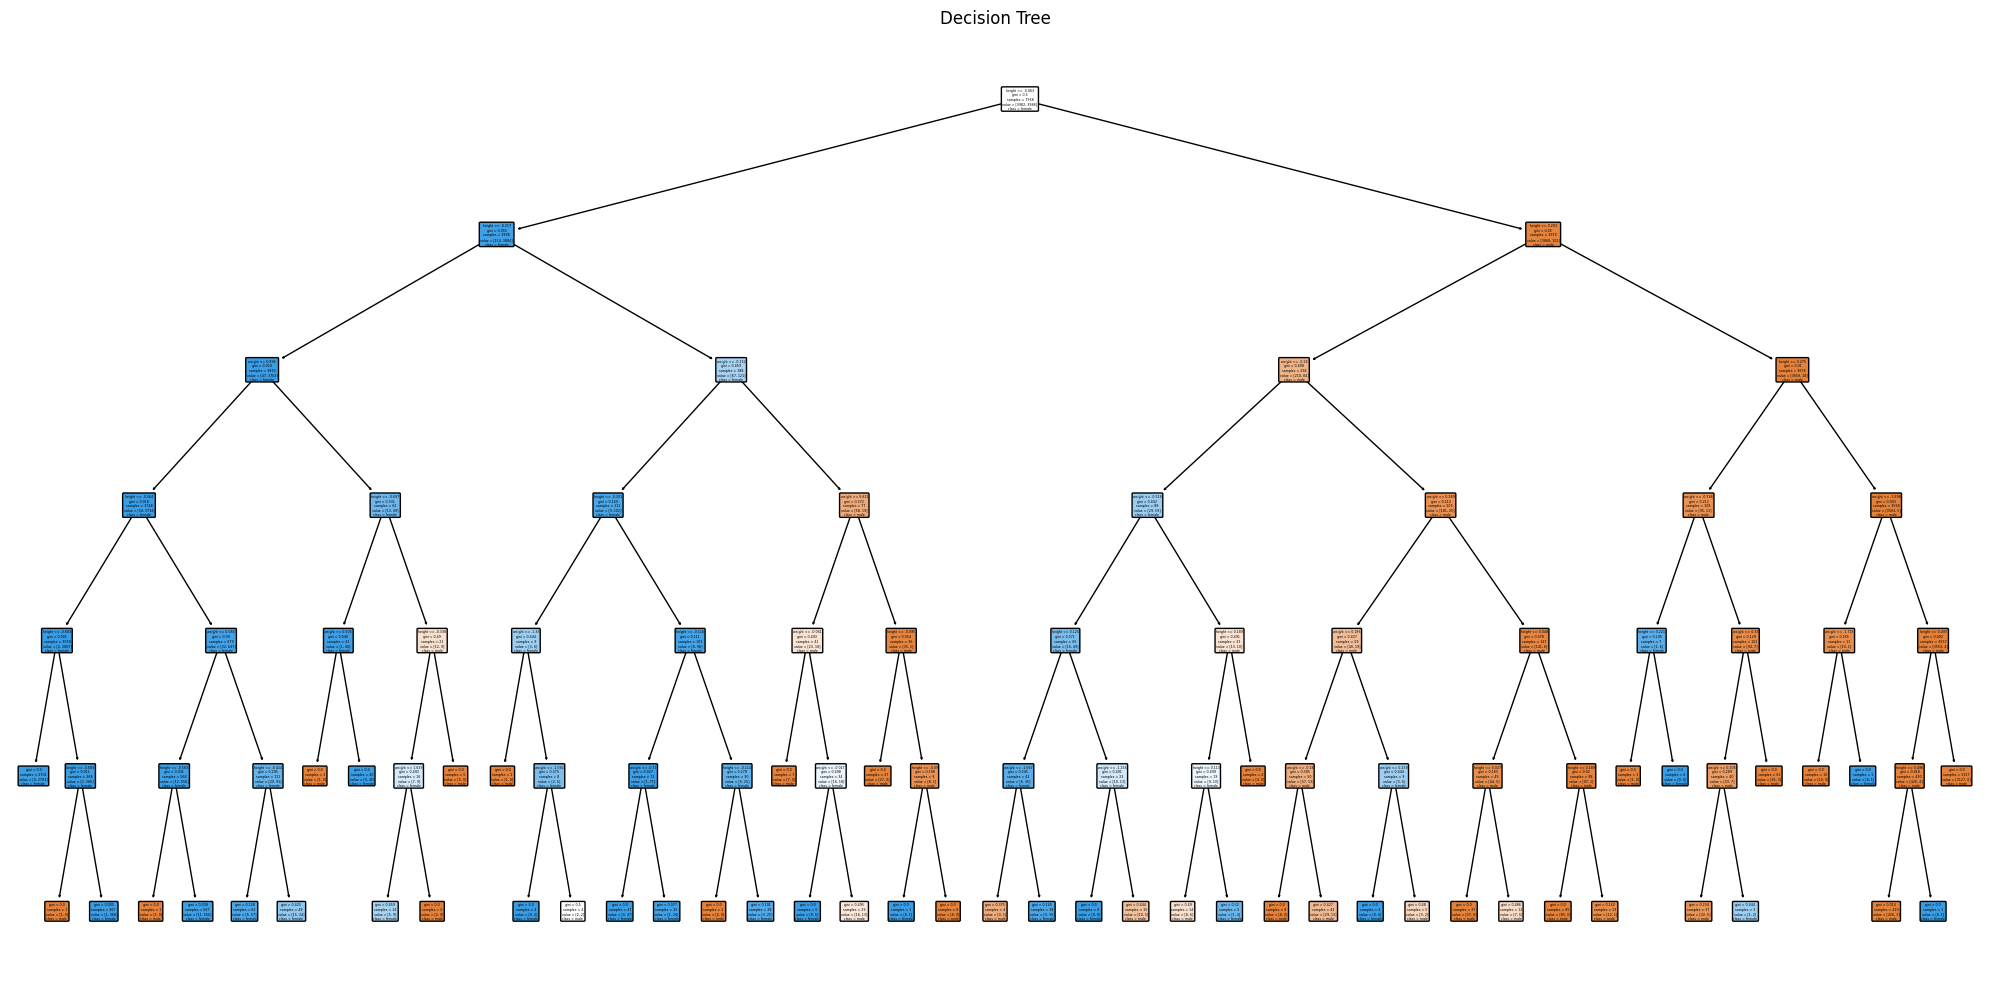

In [173]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=['height', 'weight'], class_names=['male', 'female'], rounded=True)
plt.title('Decision Tree')
plt.tight_layout()
plt.show()

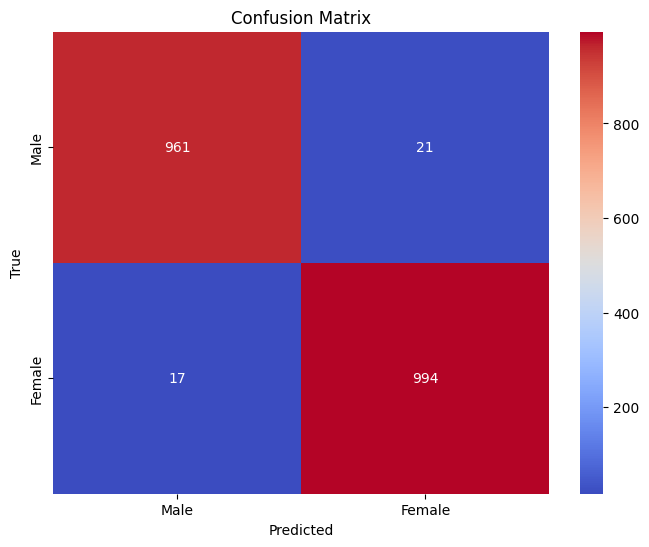

In [174]:
# Confusion matrix 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [175]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       978
           1       0.98      0.98      0.98      1015

    accuracy                           0.98      1993
   macro avg       0.98      0.98      0.98      1993
weighted avg       0.98      0.98      0.98      1993



Plot Decision Boundary

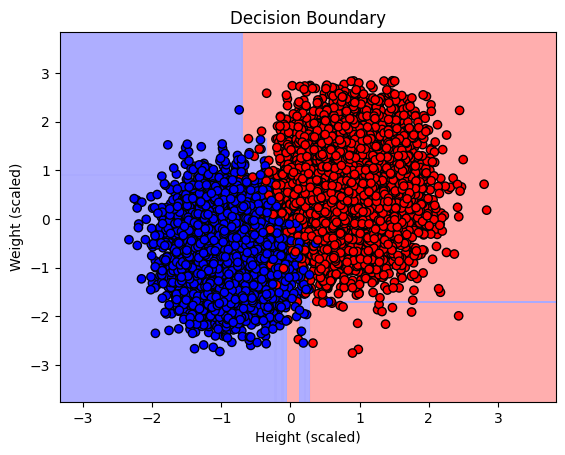

In [176]:
def plot_decision_boundary(clf, X, y, title='Decision Boundary'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # Only use height and weight
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.95, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Height (scaled)')
    plt.ylabel('Weight (scaled)')
    plt.show()

# Plot decision boundary using height and weight features
plot_decision_boundary(clf, X_scaled[:, :], y)